In [1]:
import pandas as pd

In [6]:
ls

'LONDON HOUSING.ipynb'


In [7]:
cd ..

/home/ndr/Dokumen/Data Science


In [8]:
cd Dataset/

/home/ndr/Dokumen/Data Science/Dataset


In [9]:
ls

'1. Weather Data.csv'  '4. covid_19_data.csv'        '7. Udemy Courses.csv'
'2. Cars Data1.csv'    '5. London Housing Data.csv'
'3. Police Data.csv'   '6. India Census 2011.csv'


In [10]:
df = pd.read_csv("5. London Housing Data.csv")

In [11]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [13]:
df.shape

(13549, 6)

In [15]:
df.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [16]:
df.date = pd.to_datetime(df.date)

In [18]:
df.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [21]:
df.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [23]:
df.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [27]:
df.no_of_crimes.isnull().value_counts()

False    7439
True     6110
Name: no_of_crimes, dtype: int64

In [28]:
import seaborn as sns

In [29]:
import matplotlib.pyplot as plt

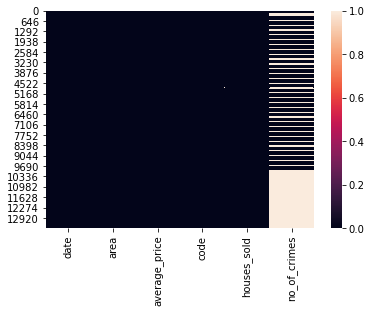

In [33]:
sns.heatmap(df.isnull());

In [35]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [37]:
df['Year'] = df.date.dt.year

In [38]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


In [39]:
df.insert(2, 'month', df.date.dt.month)

In [44]:
df.drop(columns='month', axis=1, inplace=True)

In [45]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


In [46]:
df.insert(6, 'month', df.date.dt.month)

In [47]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,month,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,2,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,3,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,4,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,5,1995


In [52]:
len(df[df.no_of_crimes == 0])

104

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

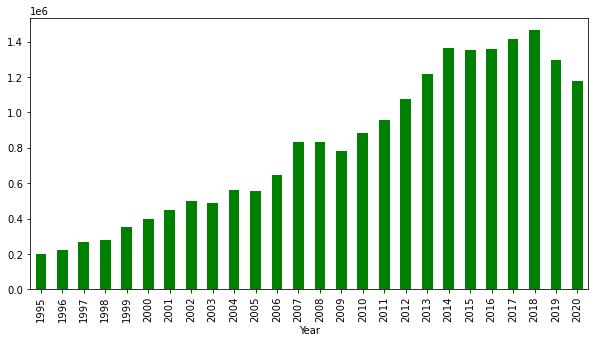

In [103]:
m = df.groupby('Year').average_price.max()

plt.figure(figsize=(10,5))
m.plot.bar(color = 'green')
plt.show();

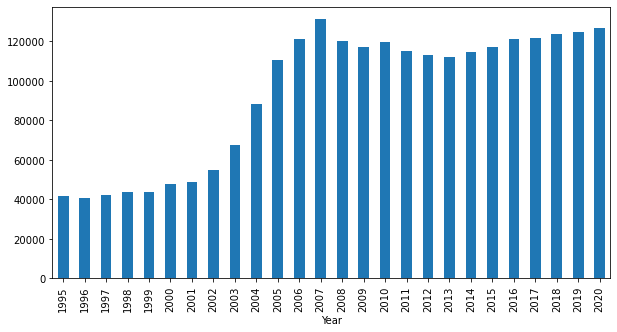

In [104]:
mi = df.groupby('Year').average_price.min()

plt.figure(figsize=(10,5))
mi.plot.bar()
plt.show();

In [65]:
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,month,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,2,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,3,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,4,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,5,1995


Text(0.5, 0, 'value')

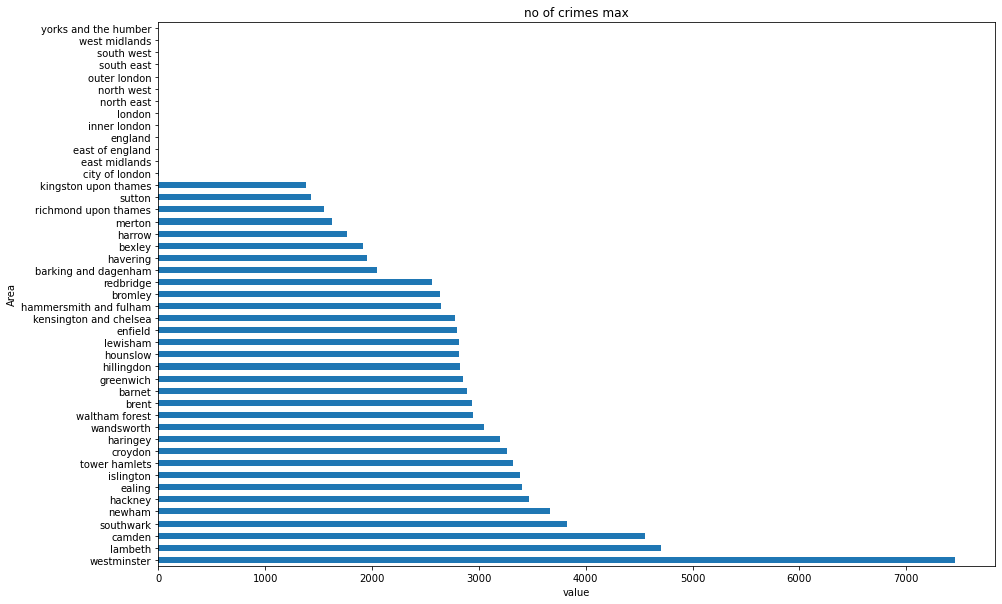

In [122]:
mm = df.groupby('area').no_of_crimes.max().sort_values(ascending = False)

plt.figure(figsize=(15,10))
mm.plot.barh()
plt.title('no of crimes max')
plt.ylabel('Area')
plt.xlabel('value')

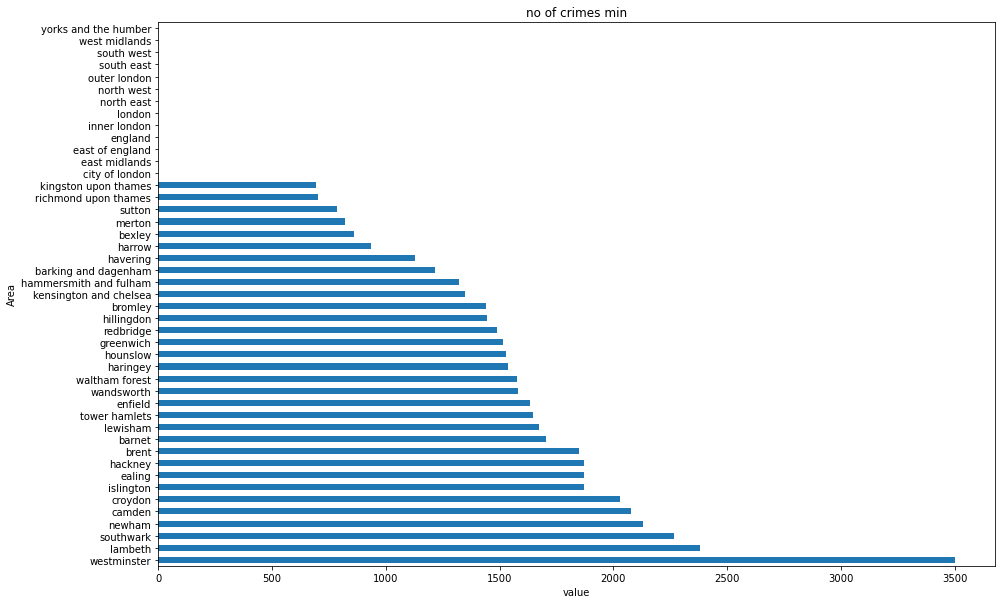

In [118]:
mii = df.groupby('area').no_of_crimes.min().sort_values(ascending = False)

plt.figure(figsize=(15,10))
mii.plot.barh();
plt.title('no of crimes min')
plt.ylabel('Area')
plt.xlabel('value')
plt.show();

In [70]:
df.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,month,Year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,2,1995


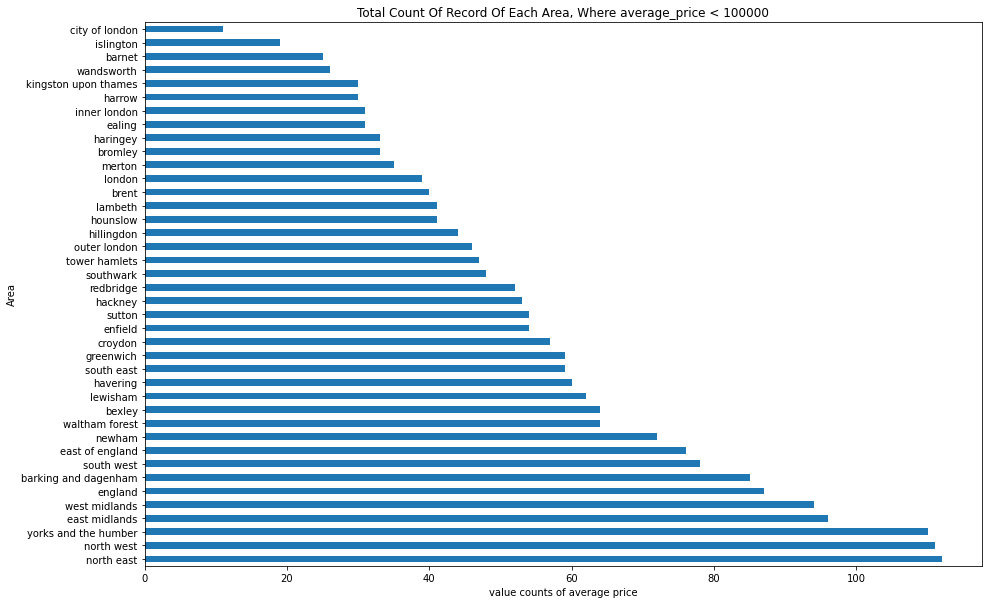

In [117]:
are = df[df.average_price < 100000].area.value_counts()

plt.figure(figsize=(15,10))
are.plot.barh()
plt.title('Total Count Of Record Of Each Area, Where average_price < 100000')
plt.ylabel('Area')
plt.xlabel('value counts of average price')
plt.show();